# Use ARIMA Model to Predict DG-1 Simulate Data


Use these ARIMA tutorials
    
Article 1: use ARIMA(4,1,0). Simple and clear set up. Predict each step and keep history. History is truth. Prediction is kept in separate list.  
https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70
        

Article 2: use auto arima to find parameters. Use seasonal decomposition. Test ad-fuller.  
https://www.kdnuggets.com/2020/01/stock-market-forecasting-time-series-analysis.html
    

# Article 1

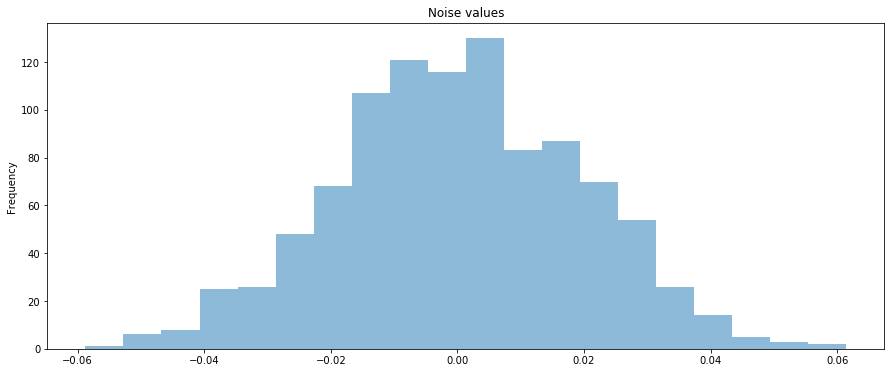

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import matplotlib.pylab
from statsmodels.tsa import stattools





# Noise
nsample = 1000
noise = np.random.normal(loc=0.0, scale=0.02, size=nsample)
pd.Series(noise).plot.hist(title='Noise values', bins=20, alpha=0.5)

In [5]:
def dg1(param={}):
  x = np.linspace(1, 1000, nsample)
  if param:
    if 'a' in param:
      a = param['a']
    else:
      a = 1/400
    if 'b' in param:
      b = param['b']
    else: 
      b = 20
    y = a * x + b
  else:
    y = 1/400 * x + 20
  return (x, y)



X, y = dg1()
# X, y = dg1({'b': 50})

# add noise
y_true = y 
y_noisy = y_true + noise

,t,y_true,y_noisy
1.0,1.0,20.0025,20.036268
2.0,2.0,20.0050,19.988999
3.0,3.0,20.0075,20.026740
4.0,4.0,20.0100,20.037283
5.0,5.0,20.0125,19.989240


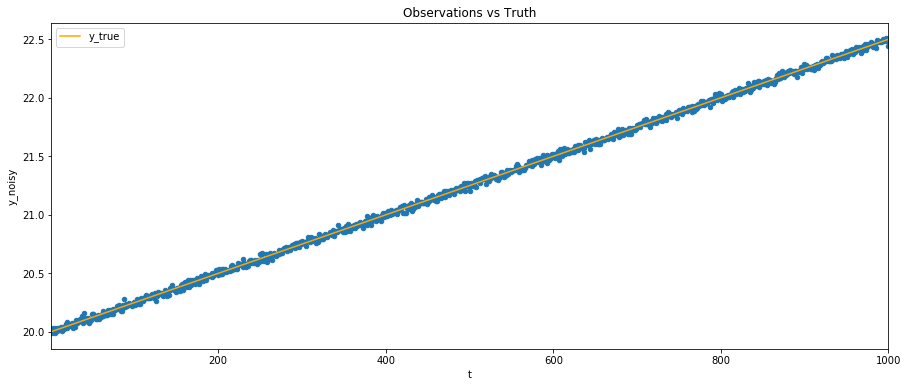

In [6]:
# Plot noisy vs true

df = pd.DataFrame({'t': X, 'y_true':y_true, 'y_noisy': y_noisy}, index=X)
df.plot.scatter(x='t',y='y_noisy', title='Observations vs Truth')
df['y_true'].plot.line(color='orange',legend=True)

df.head()

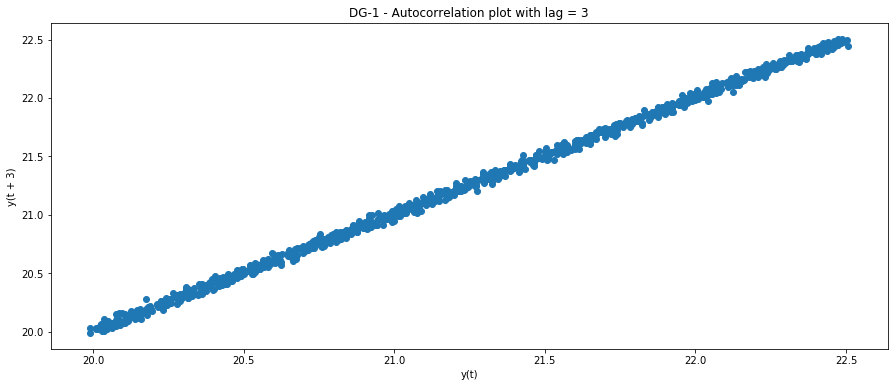

In [11]:
# Check Autocorrelation

plt.figure()
lag_plot(df['y_noisy'], lag=3)
plt.title('DG-1 - Autocorrelation plot with lag = 3')
plt.show()

In [12]:
# divide the data into a training (70 % ) and test (30%)
# select the following ARIMA parameters: p=4, d=1 and q=0.
# run model and keep results

train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['y_noisy'].values
test_data = test_data['y_noisy'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)



MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.0004204435625534068


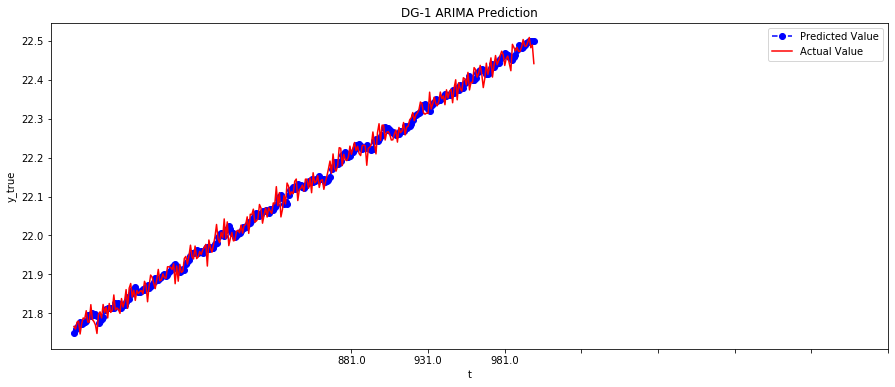

In [13]:
# plot

test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Value')
plt.plot(test_set_range, test_data, color='red', label='Actual Value')
plt.title('DG-1 ARIMA Prediction')
plt.xlabel('t')
plt.ylabel('y_true')
plt.xticks(np.arange(881,1259,50), df.t[881:1259:50])
plt.legend()
plt.show()

# Article 3

KDNugget

In [14]:
!pip install pmdarima

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [15]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [16]:
# Load the dataset.
data = df

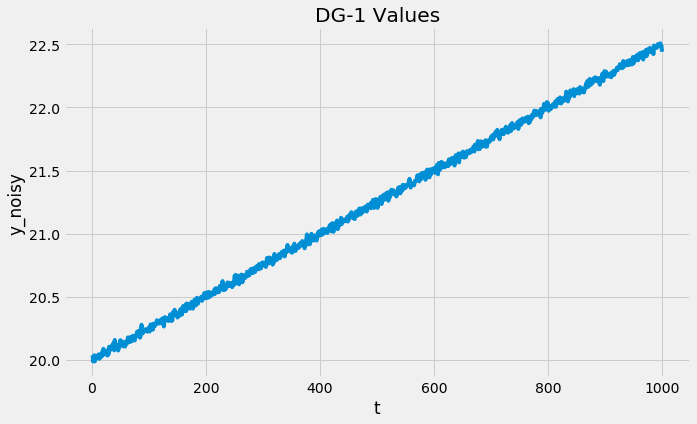

In [17]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y_noisy')
plt.plot(data['y_noisy'])
plt.title('DG-1 Values')
plt.show()

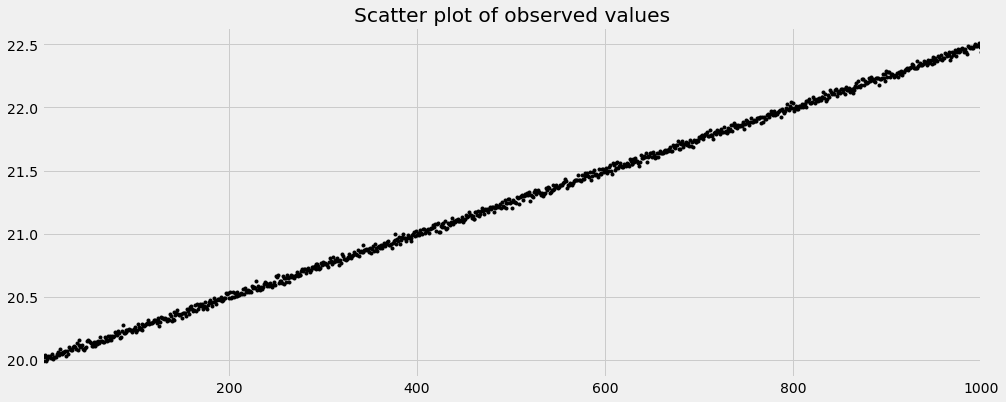

In [18]:
df_close = data['y_noisy']
df_close.plot(style='k.')
plt.title('Scatter plot of observed values')
plt.show()

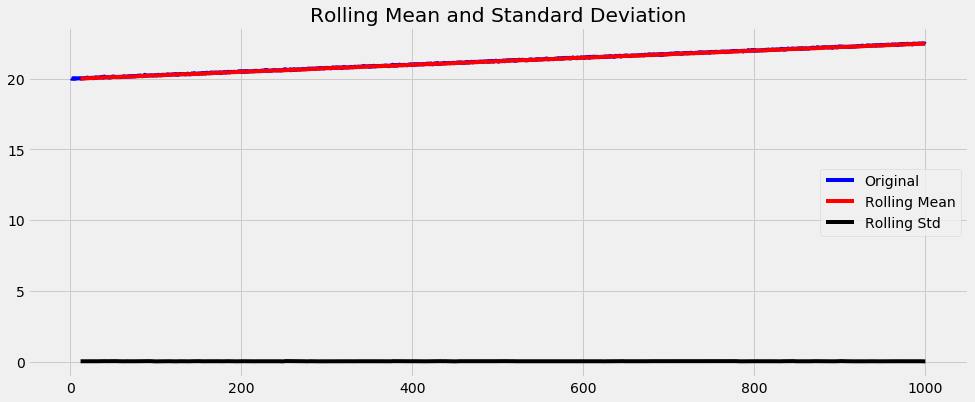

Results of dickey fuller test
Test Statistics                 -0.126033
p-value                          0.946783
No. of lags used                21.000000
Number of observations used    978.000000
critical value (1%)             -3.437054
critical value (5%)             -2.864500
critical value (10%)            -2.568346
dtype: float64


In [19]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

In [20]:
# We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. 
# Also, the test statistics is greater than the critical values. so the data is non-stationary.

<Figure size 1080x432 with 0 Axes>

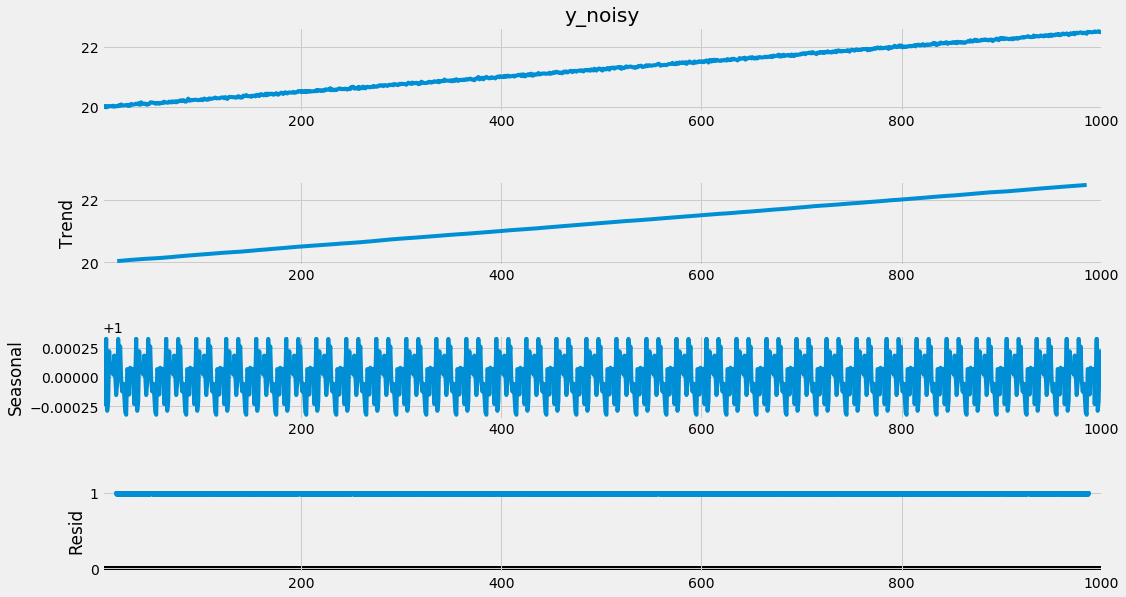

In [21]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


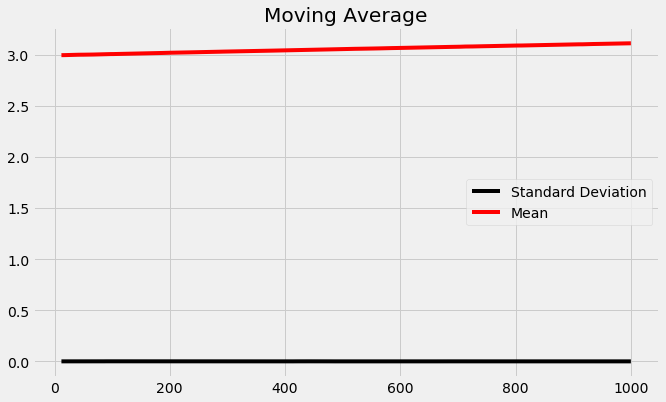

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

# Split Data Train/Test

Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

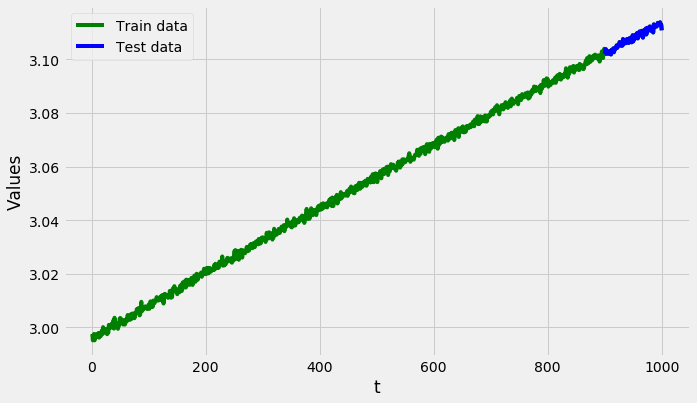

In [23]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Values')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [24]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4553.402, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.82 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8591.317, Time=2.78 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.41 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-7388.088, Time=0.70 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=1.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.75 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=5.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9705.142, Time=0.68 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-4880.224, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-9702.825, Time=0.67 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-9513.067, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3701.974, Time=0.14

In [26]:
# model = ARIMA(train_data, order=(0, 1, 0))  
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.y_noisy   No. Observations:                  897
Model:                 ARIMA(3, 1, 2)   Log Likelihood                4985.123
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 24 Sep 2020   AIC                          -9956.246
Time:                        20:42:00   BIC                          -9922.653
Sample:                             1   HQIC                         -9943.411
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0001   1.08e-06    109.646      0.000       0.000       0.000
ar.L1.D.y_noisy    -0.7633      0.296     -2.582      0.010      -1.343      -0.184
ar.L2.D.y_noisy     0.0148      

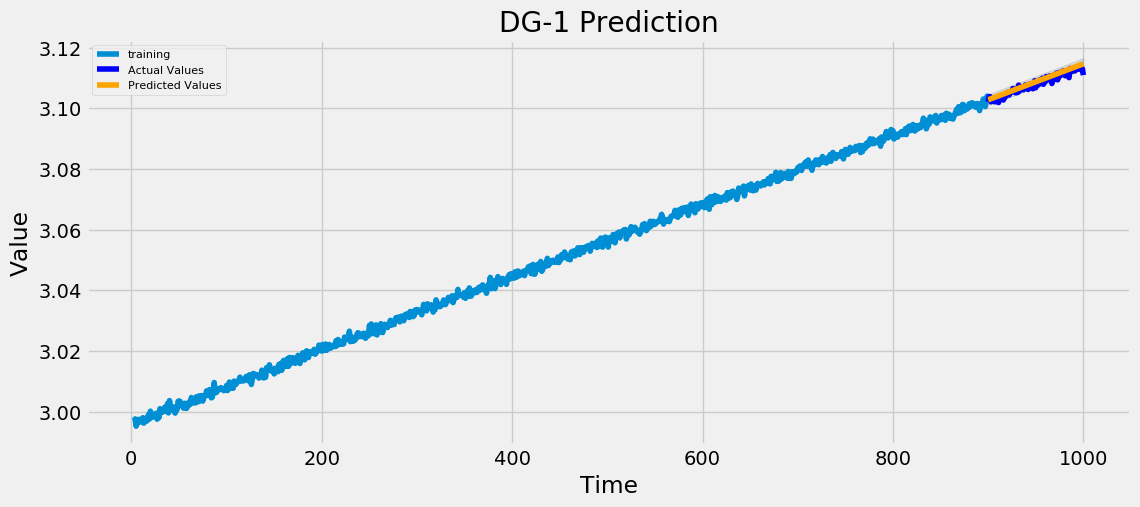

In [29]:
# Forecast - note the 96 has to match test set length
fc, se, conf = fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Values')
plt.plot(fc_series, color = 'orange',label='Predicted Values')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('DG-1 Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [30]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 1.210654847053496e-06
MAE: 0.0008861591961886843
RMSE: 0.0011002976174896936
MAPE: 0.00028514821706716485
